Analysis of the cigarettes harmfulness

In this short study, we would like to analyse the harmfulness of cigarettes with the explaining variable TAR, NICO and weight.

Part one: quick look on the data

In [11]:
#Set the working environment
getwd()
setwd("C:\\Users\\William\\Documents\\Data Science - ML\\Rakoto - TD - Econometrics\\TD4 - Regression sous R (II)\\Econometrie_TD_4_Data")

#Data Importation
df<- read.table(file="cigarettes_pour_regression.txt",sep="\t",header=TRUE,dec=".",row.names=1)

[1] "C:/Users/William/Documents/Data Science - ML/Rakoto - TD - Econometrics/TD4 - Regression sous R (II)/Econometrie_TD_4_Data"

In [9]:
head(df)

Cigarette,TAR,NICOTINE,WEIGHT,CO
Alpine,14.1,0.86,0.9853,13.6
Benson_Hedges,16.0,1.06,1.0938,16.6
CamelLights,8.0,0.67,0.9280,10.2
Carlton,4.1,0.40,0.9462,5.4
Chesterfield,15.0,1.04,0.8885,15.0
GoldenLights,8.8,0.76,1.0267,9.0


2. Print information of the dataset

In [12]:
print(dim(df))

[1] 24  4


We have 24 observation and 4 variables

3. Print name of observation and variables

In [14]:
#Observation
print(rownames(df))

 [1] "Alpine"           "Benson_Hedges"    "CamelLights"      "Carlton"         
 [5] "Chesterfield"     "GoldenLights"     "Kent"             "Kool"            
 [9] "L_M"              "LarkLights"       "Marlboro"         "Merit"           
[13] "MultiFilter"      "NewportLights"    "Now"              "OldGold"         
[17] "PallMallLight"    "Raleigh"          "SalemUltra"       "Tareyton"        
[21] "TrueLight"        "ViceroyRichLight" "VirginiaSlims"    "WinstonLights"   


In [15]:
#Variables
print(colnames(df))

[1] "TAR"      "NICOTINE" "WEIGHT"   "CO"      


4. Statistics summary

In [16]:
summary(df)

      TAR           NICOTINE          WEIGHT             CO        
 Min.   : 1.00   Min.   :0.1300   Min.   :0.7851   Min.   : 1.500  
 1st Qu.: 8.45   1st Qu.:0.6850   1st Qu.:0.9215   1st Qu.: 9.875  
 Median :12.60   Median :0.8800   Median :0.9535   Median :12.800  
 Mean   :11.48   Mean   :0.8283   Mean   :0.9622   Mean   :12.071  
 3rd Qu.:15.03   3rd Qu.:1.0200   3rd Qu.:0.9907   3rd Qu.:15.100  
 Max.   :17.00   Max.   :1.2600   Max.   :1.1240   Max.   :18.500  

5. Scatter plot for all the pair of varialbes. 

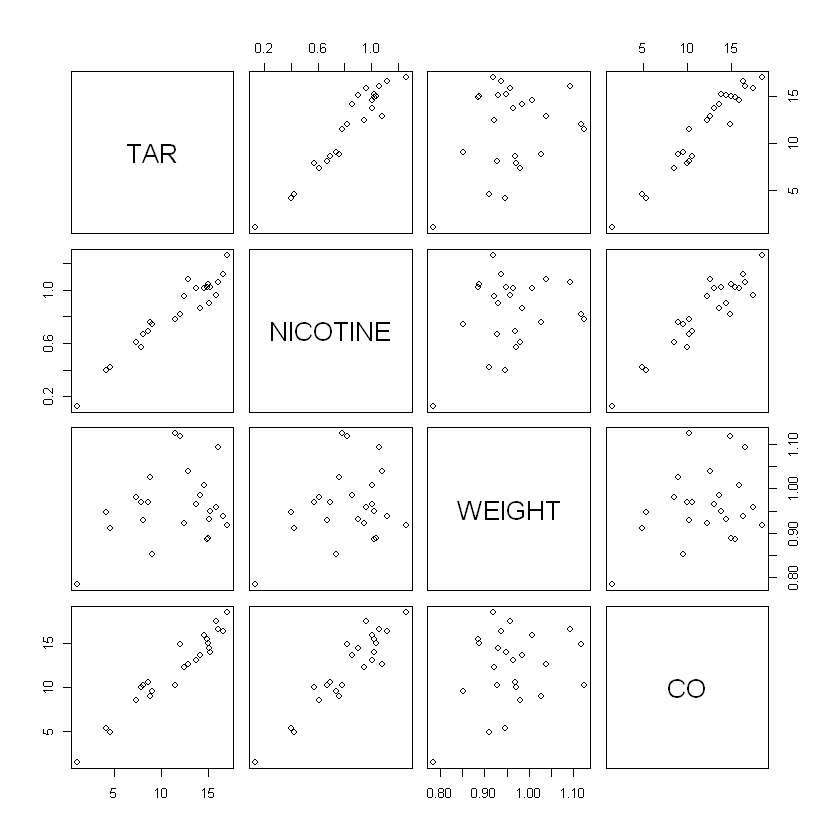

In [17]:
pairs(df)

We observe a strong correlation between variables, especially with the endogenous "CO".

Some outliers are present in the dataset, one brand in particular looks to have a very small value of CO.

Part two: Multiple Linear Regression

6. Multiple regression explaining CO from all the other variables

In [32]:
m1 <- lm(CO ~ TAR + NICOTINE + WEIGHT, data = df)

7. Calculate the R2, Significativity of the model and the coefficient.

In [33]:
sum_m1=summary(m1)

In [34]:
print(sum_m1)


Call:
lm(formula = CO ~ TAR + NICOTINE + WEIGHT, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1083 -0.8046 -0.1199  1.0095  2.0501 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.5517     2.9713  -0.186 0.854569    
TAR           0.8876     0.1955   4.540 0.000199 ***
NICOTINE      0.5185     3.2523   0.159 0.874941    
WEIGHT        2.0793     3.1784   0.654 0.520431    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.16 on 20 degrees of freedom
Multiple R-squared:  0.935,	Adjusted R-squared:  0.9252 
F-statistic: 95.86 on 3 and 20 DF,  p-value: 4.85e-12



In [35]:
#R2
print(sum_m1[8])

$r.squared
[1] 0.9349753



In [37]:
#F-Stat
print(sum_m1[10])

$fstatistic
  value   numdf   dendf 
95.8585  3.0000 20.0000 



In [ ]:
Only the variable TAR is significatively different from 0. (p-value = Pr(>|t|) < 0.05).
It confirms the expectations from the graph.
Nevertheless NICOTINE seems not to be relevant is the model.

8. Coefficients.

In [43]:
print(sum_m1$coefficient)
print(class(sum_m1$coefficient))
print(dim(sum_m1$coefficient))

              Estimate Std. Error    t value     Pr(>|t|)
(Intercept) -0.5516976  2.9712809 -0.1856767 0.8545685010
TAR          0.8875803  0.1954817  4.5404782 0.0001990908
NICOTINE     0.5184696  3.2523311  0.1594148 0.8749410220
WEIGHT       2.0793442  3.1784171  0.6542075 0.5204306639
[1] "matrix"
[1] 4 4


9. Standard-deviation of the coefficients estimated

In [50]:
print(sum_m1$coefficients[,2])

(Intercept)         TAR    NICOTINE      WEIGHT 
  2.9712809   0.1954817   3.2523311   3.1784171 


10. For each coefficient, calculate the CI at 95%.

In [53]:
#quantile Student law
qs <- qt(0.975,24-3-1)

#law bound
print(sum_m1$coefficient[,1]-qs*sum_m1$coefficient[,2])

#High bounds
print(sum_m1$coefficient[,1]+qs*sum_m1$coefficient[,2])

(Intercept)         TAR    NICOTINE      WEIGHT 
 -6.7496811   0.4798127  -6.2657743  -4.5507177 
(Intercept)         TAR    NICOTINE      WEIGHT 
   5.646286    1.295348    7.302713    8.709406 


Part 3: residual analysis